In [3]:
import streamlit as app
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as stats
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 63.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 109.6 MB/s eta 0:00:00


In [4]:
# =====================================================
# SETUP DASHBOARD
# =====================================================
app.set_page_config(page_title="Analisis Kepuasan Pegawai", layout="wide")
app.title("📌 Dashboard Evaluasi Kepuasan Layanan")
app.caption("Visualisasi dan analisis data survei berbasis indikator")

2026-02-27 05:50:17.293 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-27 05:50:17.295 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-27 05:50:17.498 
  command:

    streamlit run /usr/local/lib/python3.12/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2026-02-27 05:50:17.498 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-27 05:50:17.499 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-27 05:50:17.502 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-27 05:50:17.503 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when runn

DeltaGenerator()

In [5]:
# =====================================================
# IMPORT DATA
# =====================================================
data = pd.read_excel("/content/data_simulasi_50_siswa_20_soal_baru.xlsx")

In [6]:
# Ambil 5 indikator utama
variabel = data.iloc[:, 1:6]
variabel = variabel.apply(pd.to_numeric, errors="coerce")

In [7]:
# =====================================================
# HITUNG INDEKS KEPUASAN
# =====================================================
rata_indikator = variabel.mean()
nilai_ikm = (rata_indikator.mean() / 5) * 100

In [8]:
def klasifikasi(nilai):
    kategori = {
        (81,100): "Sangat Baik",
        (66,80): "Baik",
        (51,65): "Cukup",
        (0,50): "Kurang"
    }
    for batas, label in kategori.items():
        if batas[0] <= nilai <= batas[1]:
            return label

In [9]:
c1, c2, c3 = app.columns(3)
c1.metric("IKM (%)", f"{nilai_ikm:.2f}")
c2.metric("Kategori Mutu", klasifikasi(nilai_ikm))
c3.metric("Jumlah Responden", data.shape[0])

app.divider()

2026-02-27 05:52:51.732 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-27 05:52:51.734 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-27 05:52:51.734 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-27 05:52:51.735 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-27 05:52:51.737 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-27 05:52:51.737 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-27 05:52:51.738 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-27 05:52:51.739 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

DeltaGenerator()

In [10]:
# =====================================================
# ANALISIS SELISIH (GAP)
# =====================================================
app.subheader("Analisis Selisih Kepuasan")

2026-02-27 05:53:14.560 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-27 05:53:14.561 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-27 05:53:14.563 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

In [11]:
selisih = 5 - rata_indikator
indikator_prioritas = selisih.sort_values(ascending=False).index[0]

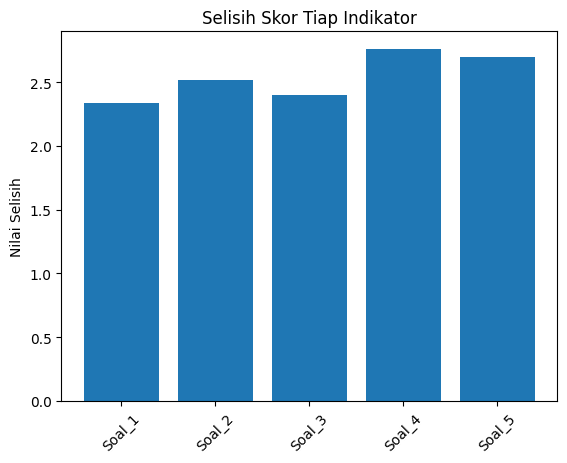

In [12]:
fig1, ax1 = plt.subplots()
ax1.bar(selisih.index, selisih.values)
ax1.set_title("Selisih Skor Tiap Indikator")
ax1.set_ylabel("Nilai Selisih")
ax1.tick_params(axis='x', rotation=45)

In [13]:
app.pyplot(fig1)
app.warning(f"Indikator prioritas peningkatan: *{indikator_prioritas}*")

app.divider()

2026-02-27 05:54:21.002 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-27 05:54:21.219 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-27 05:54:21.220 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-27 05:54:21.221 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-27 05:54:21.222 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-27 05:54:21.224 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-27 05:54:21.224 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-27 05:54:21.225 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

DeltaGenerator()

In [14]:
# =====================================================
# ANALISIS HUBUNGAN (KORELASI)
# =====================================================
app.subheader("Analisis Hubungan Antar Variabel")

2026-02-27 05:54:39.899 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-27 05:54:39.901 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-27 05:54:39.901 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

In [15]:
mat_korelasi = variabel.corr()

In [16]:
fig2, ax2 = plt.subplots()
heat = ax2.imshow(mat_korelasi, cmap="viridis")
plt.colorbar(heat)

In [17]:
ax2.set_xticks(range(len(mat_korelasi.columns)))
ax2.set_yticks(range(len(mat_korelasi.columns)))
ax2.set_xticklabels(mat_korelasi.columns, rotation=45)
ax2.set_yticklabels(mat_korelasi.columns)

[Text(0, 0, 'Soal_1'),
 Text(0, 1, 'Soal_2'),
 Text(0, 2, 'Soal_3'),
 Text(0, 3, 'Soal_4'),
 Text(0, 4, 'Soal_5')]

In [19]:
app.pyplot(fig2)

2026-02-27 05:56:59.472 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-27 05:56:59.674 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-27 05:56:59.676 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-27 05:56:59.677 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

In [20]:
ranking = mat_korelasi.iloc[:-1, -1].sort_values(ascending=False)
app.dataframe(ranking.to_frame("Korelasi terhadap Indikator Akhir"))

2026-02-27 05:57:42.325 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-27 05:57:42.327 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-27 05:57:42.327 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

In [21]:
app.divider()


2026-02-27 05:57:54.665 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-27 05:57:54.666 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-27 05:57:54.667 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

In [22]:
# =====================================================
# ANALISIS REGRESI
# =====================================================
app.subheader("Model Regresi Linear")

2026-02-27 05:58:28.158 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-27 05:58:28.159 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-27 05:58:28.160 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

In [23]:
X = stats.add_constant(variabel.iloc[:, 0:4])
Y = variabel.iloc[:, 4]

In [24]:
regresi = stats.OLS(Y, X).fit()

In [25]:
koef = regresi.params[1:]
nilai_r2 = regresi.rsquared

In [26]:
fig3, ax3 = plt.subplots()
ax3.bar(koef.index, koef.values)
ax3.axhline(0)
ax3.set_title("Nilai Koefisien Regresi")

Text(0.5, 1.0, 'Nilai Koefisien Regresi')

In [27]:
app.pyplot(fig3)
app.info(f"Koefisien Determinasi (R²): {nilai_r2:.3f}")
app.success(f"Variabel paling berpengaruh: {koef.abs().idxmax()}")


2026-02-27 06:00:22.368 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-27 06:00:22.496 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-27 06:00:22.497 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-27 06:00:22.498 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-27 06:00:22.501 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-27 06:00:22.502 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-27 06:00:22.503 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-27 06:00:22.506 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

DeltaGenerator()

In [28]:
app.divider()

2026-02-27 06:00:38.760 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-27 06:00:38.762 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-27 06:00:38.763 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

In [29]:
# =====================================================
# SEGMENTASI RESPONDEN (CLUSTERING)
# =====================================================
app.subheader("Segmentasi Kepuasan Pegawai")

2026-02-27 06:01:13.498 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-27 06:01:13.500 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-27 06:01:13.500 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

In [30]:
normalisasi = StandardScaler()
data_scaled = normalisasi.fit_transform(variabel.fillna(variabel.mean()))

In [31]:
model_cluster = KMeans(n_clusters=3, random_state=10)
hasil_cluster = model_cluster.fit_predict(data_scaled)

In [32]:
df_cluster = variabel.copy()
df_cluster["Kelompok"] = hasil_cluster

In [33]:
rata_cluster = df_cluster.groupby("Kelompok").mean()

In [34]:
app.dataframe(rata_cluster)


2026-02-27 06:03:52.056 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-27 06:03:52.057 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-27 06:03:52.058 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

In [35]:
app.success("Segmentasi selesai dilakukan.")

2026-02-27 06:04:16.929 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-27 06:04:16.933 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-27 06:04:16.934 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()